# Disaster Events Dataset
### Cleaned and analyzed by Joshua Ye for Professor Oz
### November 20, 2021

In [174]:
# Import necessary libraries
import pandas as pd

# Reading disaster events csv
disaster_events = pd.read_csv("disaster events.csv", low_memory=False)

# Disaster Events Dataset Cleaning
### Steps outlined below:

In [175]:
# Removed empty columns
disaster_events.dropna(inplace=True, axis=1, how='all')

# Removed empty rows
disaster_events.dropna(inplace=True, how='all')

# Gave column name: ID
disaster_events = disaster_events.rename({"Unnamed: 0": "ID"}, axis=1)

# Converting to int, such as 25K to 25000
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0
disaster_events['DAMAGE_PROPERTY'] = disaster_events['DAMAGE_PROPERTY'].apply(value_to_float)
disaster_events['DAMAGE_CROPS'] = disaster_events['DAMAGE_CROPS'].apply(value_to_float)

disaster_events

,ID,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EVENT_ID,STATE,STATE_FIPS,...,DAMAGE_CROPS,SOURCE,MAGNITUDE,MAGNITUDE_TYPE,FLOOD_CAUSE,CATEGORY,TOR_F_SCALE,EPISODE_NARRATIVE,EVENT_NARRATIVE,DATA_SOURCE
0,108917.0,198506.0,22.0,0.0,198506.0,22.0,0.0,10107309.0,OKLAHOMA,40.0,...,0.0,NaN,0.75,NaN,NaN,NaN,NaN,NaN,NaN,PUB
1,109354.0,198507.0,5.0,0.0,198507.0,5.0,0.0,10108409.0,OKLAHOMA,40.0,...,0.0,NaN,0.88,NaN,NaN,NaN,NaN,NaN,NaN,PUB
2,109499.0,198505.0,31.0,0.0,198505.0,31.0,0.0,10115962.0,PENNSYLVANIA,42.0,...,0.0,NaN,0.00,NaN,NaN,NaN,NaN,NaN,NaN,PUB
3,109576.0,198505.0,7.0,0.0,198505.0,7.0,0.0,10108104.0,OKLAHOMA,40.0,...,0.0,NaN,1.75,NaN,NaN,NaN,NaN,NaN,NaN,PUB
4,109761.0,198508.0,7.0,0.0,198508.0,7.0,0.0,10109330.0,OKLAHOMA,40.0,...,0.0,NaN,56.00,NaN,NaN,NaN,NaN,NaN,NaN,PUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048416,1157049.0,201205.0,1.0,1645.0,201205.0,1.0,1648.0,368722.0,MINNESOTA,27.0,...,0.0,Trained Spotter,1.75,NaN,NaN,NaN,NaN,A frontal boundary that lied across central Mi...,Golf ball size hail lasted for several minutes...,CSV
1048417,1157050.0,201203.0,15.0,1420.0,201203.0,15.0,1420.0,365958.0,TENNESSEE,47.0,...,NaN,Fire Department/Rescue,0.88,NaN,NaN,NaN,NaN,Mainly during the afternoon hours on Wednesday...,NaN,CSV
1048418,1157051.0,201203.0,15.0,1340.0,201203.0,15.0,1340.0,367160.0,TENNESSEE,47.0,...,NaN,Trained Spotter,1.75,NaN,NaN,NaN,NaN,Mainly during the afternoon hours on Wednesday...,Hail up to golf ball size covered the ground u...,CSV
1048419,1157052.0,201203.0,15.0,1510.0,201203.0,15.0,1510.0,367162.0,TENNESSEE,47.0,...,NaN,Public,1.75,NaN,NaN,NaN,NaN,Mainly during the afternoon hours on Wednesday...,NaN,CSV


# Disaster Events Descriptive Statistics
### By overall, year, and location:

In [176]:
# Overall descriptive statistics
disaster_events[['INJURIES_DIRECT', 'INJURIES_INDIRECT','DEATHS_DIRECT','DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']].describe().round(2)

,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,DEATHS_INDIRECT,DAMAGE_PROPERTY,DAMAGE_CROPS
count,1048289.00,1048289.00,1048289.00,1048289.00,6.080030e+05,4.963690e+05
mean,0.07,0.01,0.01,0.00,5.167828e+05,8.914458e+04
std,3.06,2.38,0.71,0.05,3.753037e+07,3.874905e+06
min,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00
25%,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00
50%,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00
75%,0.00,0.00,0.00,0.00,5.000000e+03,0.000000e+00
max,1150.00,2400.00,638.00,11.00,1.790000e+10,1.050000e+09


In [177]:
# Descriptive statistics by year
for year in range(1985, 2012):
    if not disaster_events[disaster_events.YEAR == year].empty:
        print("\nDescriptive statistics for", year)
        print(disaster_events[['INJURIES_DIRECT', 'INJURIES_INDIRECT','DEATHS_DIRECT','DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']][disaster_events.YEAR == year].describe().round(2))


Descriptive statistics for 1985
       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count          7979.00             7979.0        7979.00           7979.0   
mean              0.19                0.0           0.01              0.0   
std               3.58                0.0           0.28              0.0   
min               0.00                0.0           0.00              0.0   
25%               0.00                0.0           0.00              0.0   
50%               0.00                0.0           0.00              0.0   
75%               0.00                0.0           0.00              0.0   
max             250.00                0.0          12.00              0.0   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     7.979000e+03        7979.0  
mean      2.015412e+05           0.0  
std       5.054970e+06           0.0  
min       0.000000e+00           0.0  
25%       0.000000e+00           0.0  
50%       0.000000e+00           0.0  


       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count         15627.00            15627.0       15627.00          15627.0   
mean              0.07                0.0           0.00              0.0   
std               1.67                0.0           0.19              0.0   
min               0.00                0.0           0.00              0.0   
25%               0.00                0.0           0.00              0.0   
50%               0.00                0.0           0.00              0.0   
75%               0.00                0.0           0.00              0.0   
max             150.00                0.0          22.00              0.0   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count         15627.00      15627.00  
mean         106241.20      35621.33  
std         1556405.85    1144402.16  
min               0.00          0.00  
25%               0.00          0.00  
50%               0.00          0.00  
75%            5000.00          0

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count         50936.00            50936.0       50936.00          50936.0   
mean              0.06                0.0           0.01              0.0   
std               1.85                0.0           0.19              0.0   
min               0.00                0.0           0.00              0.0   
25%               0.00                0.0           0.00              0.0   
50%               0.00                0.0           0.00              0.0   
75%               0.00                0.0           0.00              0.0   
max             300.00                0.0          17.00              0.0   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     1.511400e+04  4.419000e+03  
mean      2.713288e+05  3.191591e+05  
std       3.132635e+06  3.203880e+06  
min       0.000000e+00  0.000000e+00  
25%       0.000000e+00  0.000000e+00  
50%       5.000000e+03  0.000000e+00  
75%       2.000000e+04  0.000000e

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count         79091.00           79091.00       79091.00         79091.00   
mean              0.11               0.01           0.01             0.00   
std               6.19               0.57           0.64             0.07   
min               0.00               0.00           0.00             0.00   
25%               0.00               0.00           0.00             0.00   
50%               0.00               0.00           0.00             0.00   
75%               0.00               0.00           0.00             0.00   
max            1150.00              90.00         158.00             8.00   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     6.539800e+04  6.502200e+04  
mean      3.228727e+05  4.717573e+04  
std       1.671982e+07  4.406941e+06  
min       0.000000e+00  0.000000e+00  
25%       0.000000e+00  0.000000e+00  
50%       0.000000e+00  0.000000e+00  
75%       2.000000e+03  0.000000e

In [178]:
# Descriptive statistics by state
states = disaster_events['STATE'].tolist()
states = list(dict.fromkeys(states))
for state in states:
    print("\nDescriptive statistics for", state)
    print(disaster_events[['INJURIES_DIRECT', 'INJURIES_INDIRECT','DEATHS_DIRECT','DEATHS_INDIRECT', 'DAMAGE_PROPERTY', 'DAMAGE_CROPS']][disaster_events.STATE == state].describe().round(2))


Descriptive statistics for OKLAHOMA
       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count         45680.00           45680.00       45680.00         45680.00   
mean              0.08               0.01           0.01             0.00   
std               2.73               0.83           0.15             0.06   
min               0.00               0.00           0.00             0.00   
25%               0.00               0.00           0.00             0.00   
50%               0.00               0.00           0.00             0.00   
75%               0.00               0.00           0.00             0.00   
max             293.00             172.00          12.00             7.00   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     2.670900e+04  2.254400e+04  
mean      1.901583e+05  5.731430e+04  
std       6.792018e+06  3.539015e+06  
min       0.000000e+00  0.000000e+00  
25%       0.000000e+00  0.000000e+00  
50%       0.000000e+00  0.000000e+0

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count         27599.00           27599.00       27599.00         27599.00   
mean              0.08               0.00           0.01             0.00   
std               1.79               0.06           0.19             0.03   
min               0.00               0.00           0.00             0.00   
25%               0.00               0.00           0.00             0.00   
50%               0.00               0.00           0.00             0.00   
75%               0.00               0.00           0.00             0.00   
max             180.00               8.00          20.00             2.00   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     1.591500e+04      14266.00  
mean      2.812330e+05      14399.29  
std       3.814926e+06     314715.12  
min       0.000000e+00          0.00  
25%       0.000000e+00          0.00  
50%       0.000000e+00          0.00  
75%       5.000000e+03          0

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count         37249.00           37249.00       37249.00         37249.00   
mean              0.03               0.00           0.00             0.00   
std               1.00               0.08           0.07             0.02   
min               0.00               0.00           0.00             0.00   
25%               0.00               0.00           0.00             0.00   
50%               0.00               0.00           0.00             0.00   
75%               0.00               0.00           0.00             0.00   
max              88.00               9.00           9.00             2.00   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     2.728600e+04  2.162900e+04  
mean      1.719792e+05  1.803024e+05  
std       5.358194e+06  2.309068e+06  
min       0.000000e+00  0.000000e+00  
25%       0.000000e+00  0.000000e+00  
50%       5.000000e+03  0.000000e+00  
75%       2.500000e+04  5.000000e

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count         34089.00           34089.00       34089.00         34089.00   
mean              0.07               0.01           0.02             0.00   
std               2.25               0.26           0.61             0.06   
min               0.00               0.00           0.00             0.00   
25%               0.00               0.00           0.00             0.00   
50%               0.00               0.00           0.00             0.00   
75%               0.00               0.00           0.00             0.00   
max             350.00              22.00          93.00             4.00   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     1.833600e+04      17542.00  
mean      1.419947e+05      35613.24  
std       3.418824e+06     800858.48  
min       0.000000e+00          0.00  
25%       0.000000e+00          0.00  
50%       0.000000e+00          0.00  
75%       2.000000e+03          0

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count          3145.00             3145.0        3145.00          3145.00   
mean              0.02                0.0           0.03             0.00   
std               0.24                0.0           0.25             0.03   
min               0.00                0.0           0.00             0.00   
25%               0.00                0.0           0.00             0.00   
50%               0.00                0.0           0.00             0.00   
75%               0.00                0.0           0.00             0.00   
max               7.00                0.0           8.00             1.00   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     1.533000e+03  1.129000e+03  
mean      1.447124e+06  4.256398e+05  
std       1.661935e+07  4.539948e+06  
min       0.000000e+00  0.000000e+00  
25%       0.000000e+00  0.000000e+00  
50%       0.000000e+00  0.000000e+00  
75%       6.000000e+03  0.000000e

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count          6774.00            6774.00        6774.00          6774.00   
mean              0.03               0.00           0.01             0.00   
std               0.58               0.17           0.18             0.06   
min               0.00               0.00           0.00             0.00   
25%               0.00               0.00           0.00             0.00   
50%               0.00               0.00           0.00             0.00   
75%               0.00               0.00           0.00             0.00   
max              33.00              10.00           8.00             2.00   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count     2.887000e+03       2575.00  
mean      3.331121e+05      37449.13  
std       7.772905e+06     824953.39  
min       0.000000e+00          0.00  
25%       0.000000e+00          0.00  
50%       0.000000e+00          0.00  
75%       0.000000e+00          0

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count          1361.00            1361.00        1361.00          1361.00   
mean              0.03               0.00           0.01             0.00   
std               0.62               0.03           0.09             0.04   
min               0.00               0.00           0.00             0.00   
25%               0.00               0.00           0.00             0.00   
50%               0.00               0.00           0.00             0.00   
75%               0.00               0.00           0.00             0.00   
max              20.00               1.00           2.00             1.00   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count           576.00         413.0  
mean         199137.15           0.0  
std         1922063.22           0.0  
min               0.00           0.0  
25%               0.00           0.0  
50%            4000.00           0.0  
75%           15000.00           

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count            707.0              707.0          707.0            707.0   
mean               0.0                0.0            0.0              0.0   
std                0.0                0.0            0.0              0.0   
min                0.0                0.0            0.0              0.0   
25%                0.0                0.0            0.0              0.0   
50%                0.0                0.0            0.0              0.0   
75%                0.0                0.0            0.0              0.0   
max                0.0                0.0            0.0              0.0   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count            252.0         250.0  
mean               0.0           0.0  
std                0.0           0.0  
min                0.0           0.0  
25%                0.0           0.0  
50%                0.0           0.0  
75%                0.0           

       INJURIES_DIRECT  INJURIES_INDIRECT  DEATHS_DIRECT  DEATHS_INDIRECT  \
count              9.0                9.0            9.0              9.0   
mean               0.0                0.0            0.0              0.0   
std                0.0                0.0            0.0              0.0   
min                0.0                0.0            0.0              0.0   
25%                0.0                0.0            0.0              0.0   
50%                0.0                0.0            0.0              0.0   
75%                0.0                0.0            0.0              0.0   
max                0.0                0.0            0.0              0.0   

       DAMAGE_PROPERTY  DAMAGE_CROPS  
count              1.0           2.0  
mean           15000.0           0.0  
std                NaN           0.0  
min            15000.0           0.0  
25%            15000.0           0.0  
50%            15000.0           0.0  
75%            15000.0           

# Disaster Events Frequency Plots
### By EVENT_TYPE, STATE, YEAR, and MONTH_NAME:

<AxesSubplot:title={'center':'Disaster Events event type frequency plot'}>

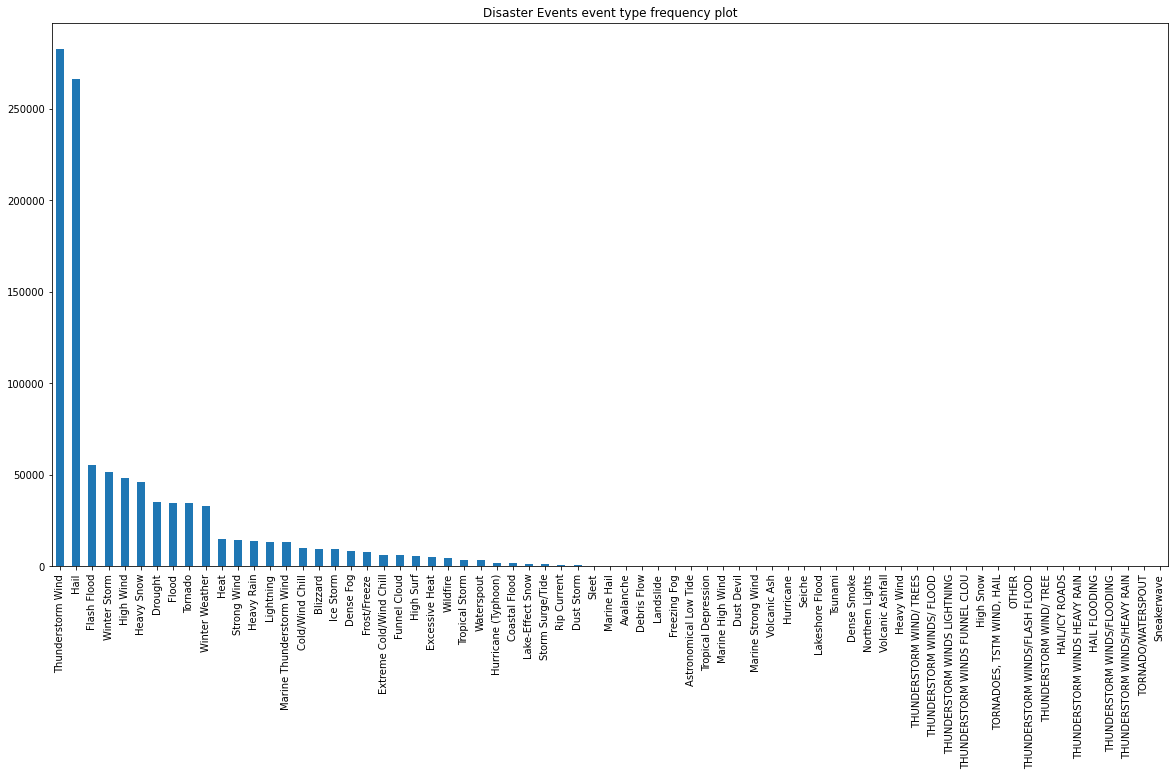

In [179]:
# Disaster Events event type frequency plot
disaster_events["EVENT_TYPE"].value_counts().plot.bar(title="Disaster Events event type frequency plot", figsize=(20,10))

<AxesSubplot:title={'center':'Disaster Events state frequency plot'}>

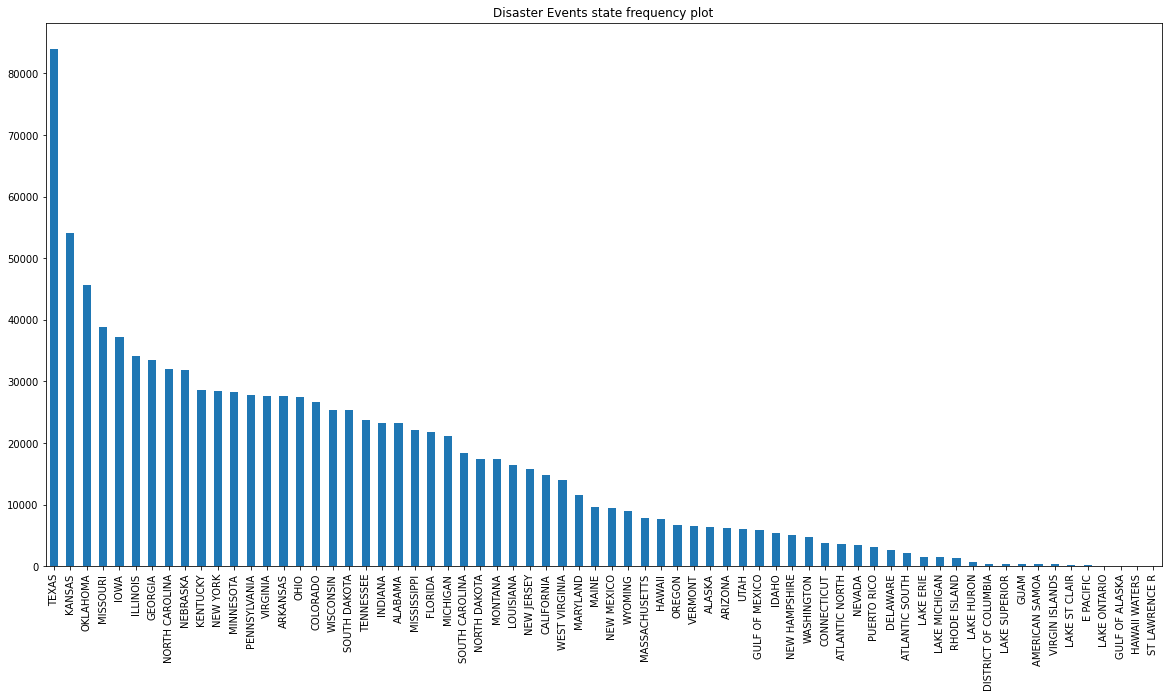

In [180]:
# Disaster Events state frequency plot
disaster_events["STATE"].value_counts().plot.bar(title="Disaster Events state frequency plot", figsize=(20,10))

<AxesSubplot:title={'center':'Disaster Events year frequency plot'}>

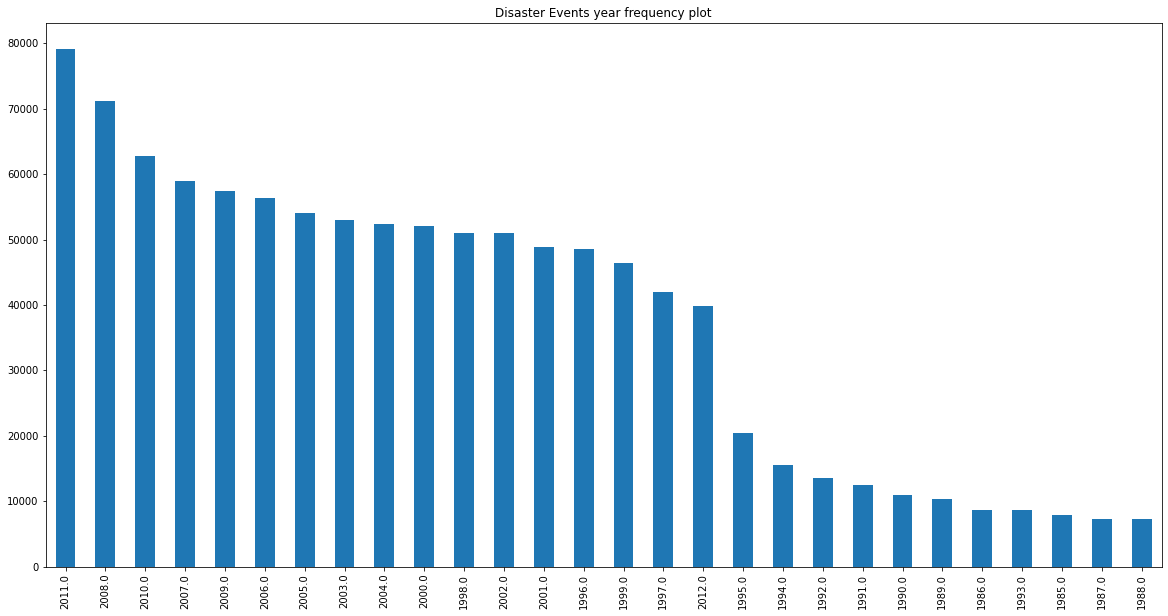

In [181]:
# Disaster Events year frequency plot
disaster_events["YEAR"].value_counts().plot.bar(title="Disaster Events year frequency plot", figsize=(20,10))

<AxesSubplot:title={'center':'Disaster Events month name frequency plot'}>

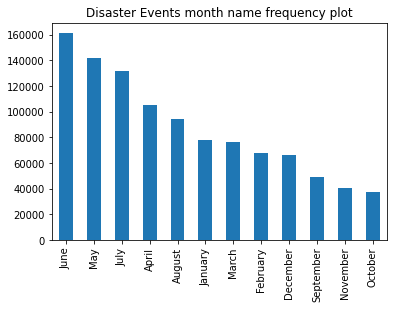

In [182]:
# Disaster Events month name frequency plot
disaster_events["MONTH_NAME"].value_counts().plot.bar(title="Disaster Events month name frequency plot")